In [1]:
import scanpy as sc 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import bbknn
sc.settings.set_figure_params(dpi_save=400, facecolor='white', fontsize=7, format='jpg')
sc.settings.verbosity = 0

In [2]:
adata = sc.read_h5ad('../data/manual_plot4.h5ad') 
qc_adata = sc.read_h5ad('../data/qc-v4.h5ad')

np.unique(adata.obs.leiden_poly)

array(['Endothelial', 'Fibroblast-like Synoviocytes', 'Fibroblasts',
       'Macrophages-M2', 'T cells', 'VSMC'], dtype=object)

In [3]:
adata = qc_adata[adata.obs['leiden_poly'].isin(['Fibroblast-like Synoviocytes'])] 
print('cells: ', adata.obs.shape[0])

cells:  10026


In [4]:
adata

View of AnnData object with n_obs × n_vars = 10026 × 30901
    obs: 'sample', 'sample_batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [5]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [6]:
adata.raw = adata
adata.write('../data/qc_fls.h5ad')

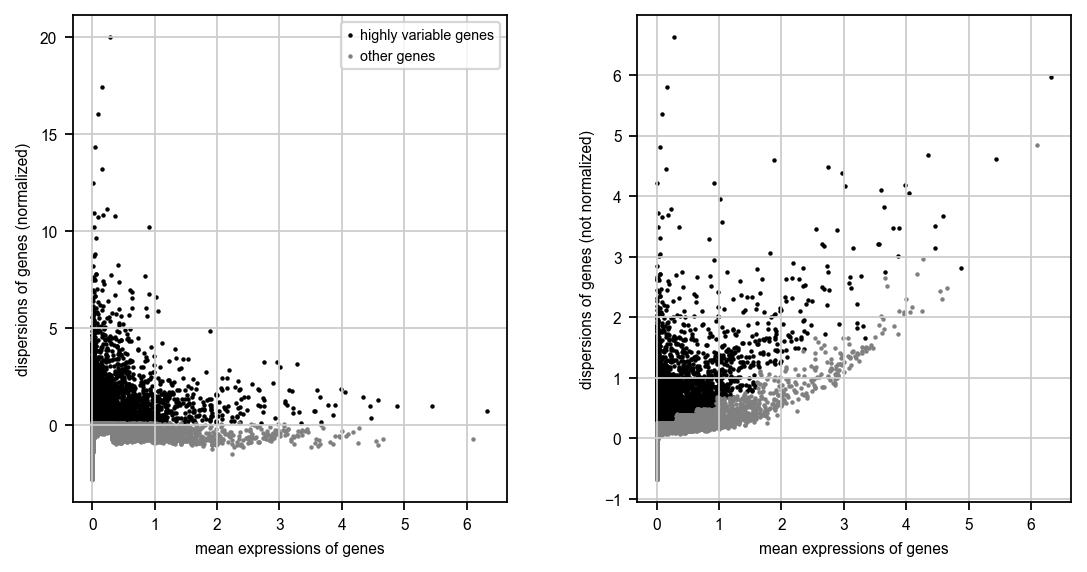

In [7]:
sc.pp.highly_variable_genes(adata, n_top_genes=10000)
sc.pl.highly_variable_genes(adata, save=True)
adata = adata[:, adata.var.highly_variable]

In [8]:
sc.pp.scale(adata, max_value=1, zero_center=False)

/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


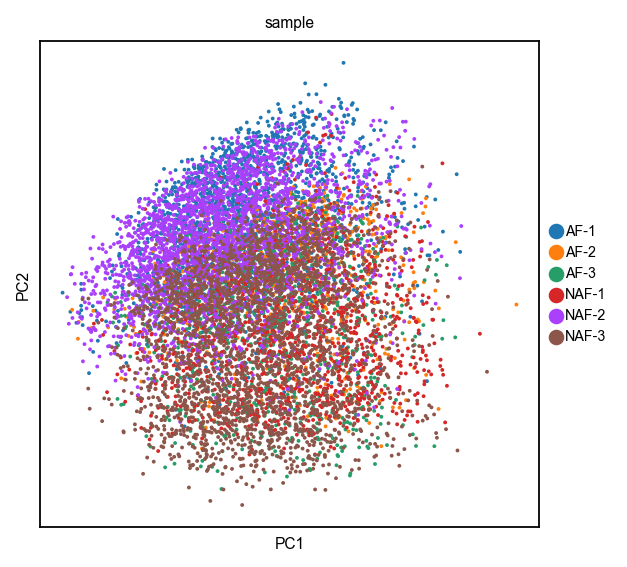

In [9]:

sc.tl.pca(adata, svd_solver='auto')
sc.pl.pca(adata, color='sample',save='_pca_sample')

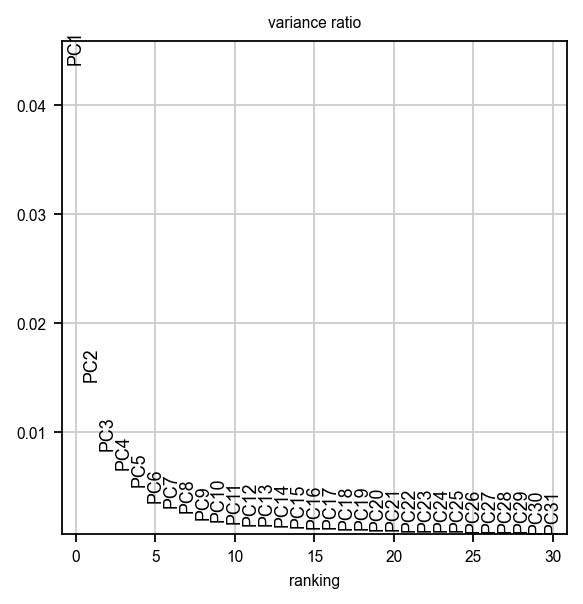

In [10]:
sc.pl.pca_variance_ratio(adata, log=False,save='_elbow') 

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


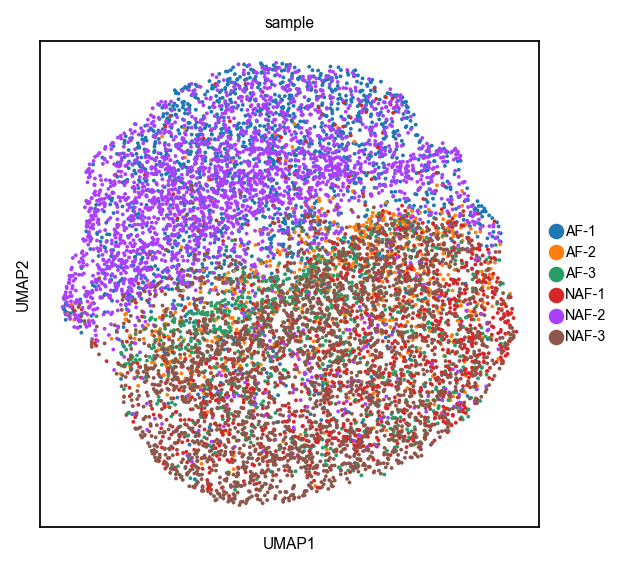

In [11]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=5)

sc.tl.umap(adata)
sc.pl.umap(adata, color=['sample'])


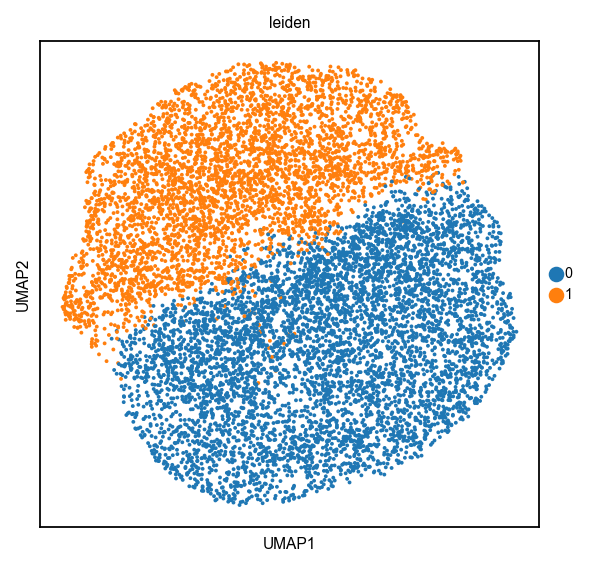

In [14]:
sc.tl.leiden(adata, resolution=0.1)
sc.pl.umap(adata, color=['leiden'])

### 下面就和general一样了

In [ ]:

adata.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon',use_raw=False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
result1 = adata.uns['rank_genes_groups']
groups = result1['names'].dtype.names
hvgdf = pd.DataFrame(
    {group + '_' + key: result1[key][group]
     for group in groups 
     for key in ['names', 'pvals','logfoldchanges']})
hvgdf.to_excel('./DEG/DEG_fib-syn.xlsx')

In [ ]:
sc.tl.dendrogram(adata,groupby='leiden')

In [ ]:
sc.pl.umap(adata, color=['leiden','sample'],save='_fls_leiden_cluster',add_outline=True,size=10)
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, min_logfoldchange=2,standard_scale='var',
                                groupby='leiden',dendrogram=True,
                               save='_fls_cluster_heatmap')

In [ ]:

new_cluster = [
   'FLS1_0',
    'FLS2_1',

]

In [ ]:

adata.rename_categories('leiden', new_cluster)

In [ ]:

sc.pl.umap(adata, color='leiden')
adata.obs['leiden_poly'] = adata.obs['leiden'].str[:-2]
sc.pl.umap(adata, color=['sample','leiden_poly'])

In [22]:
adata.write('../data/v4-sub-fls.h5ad')

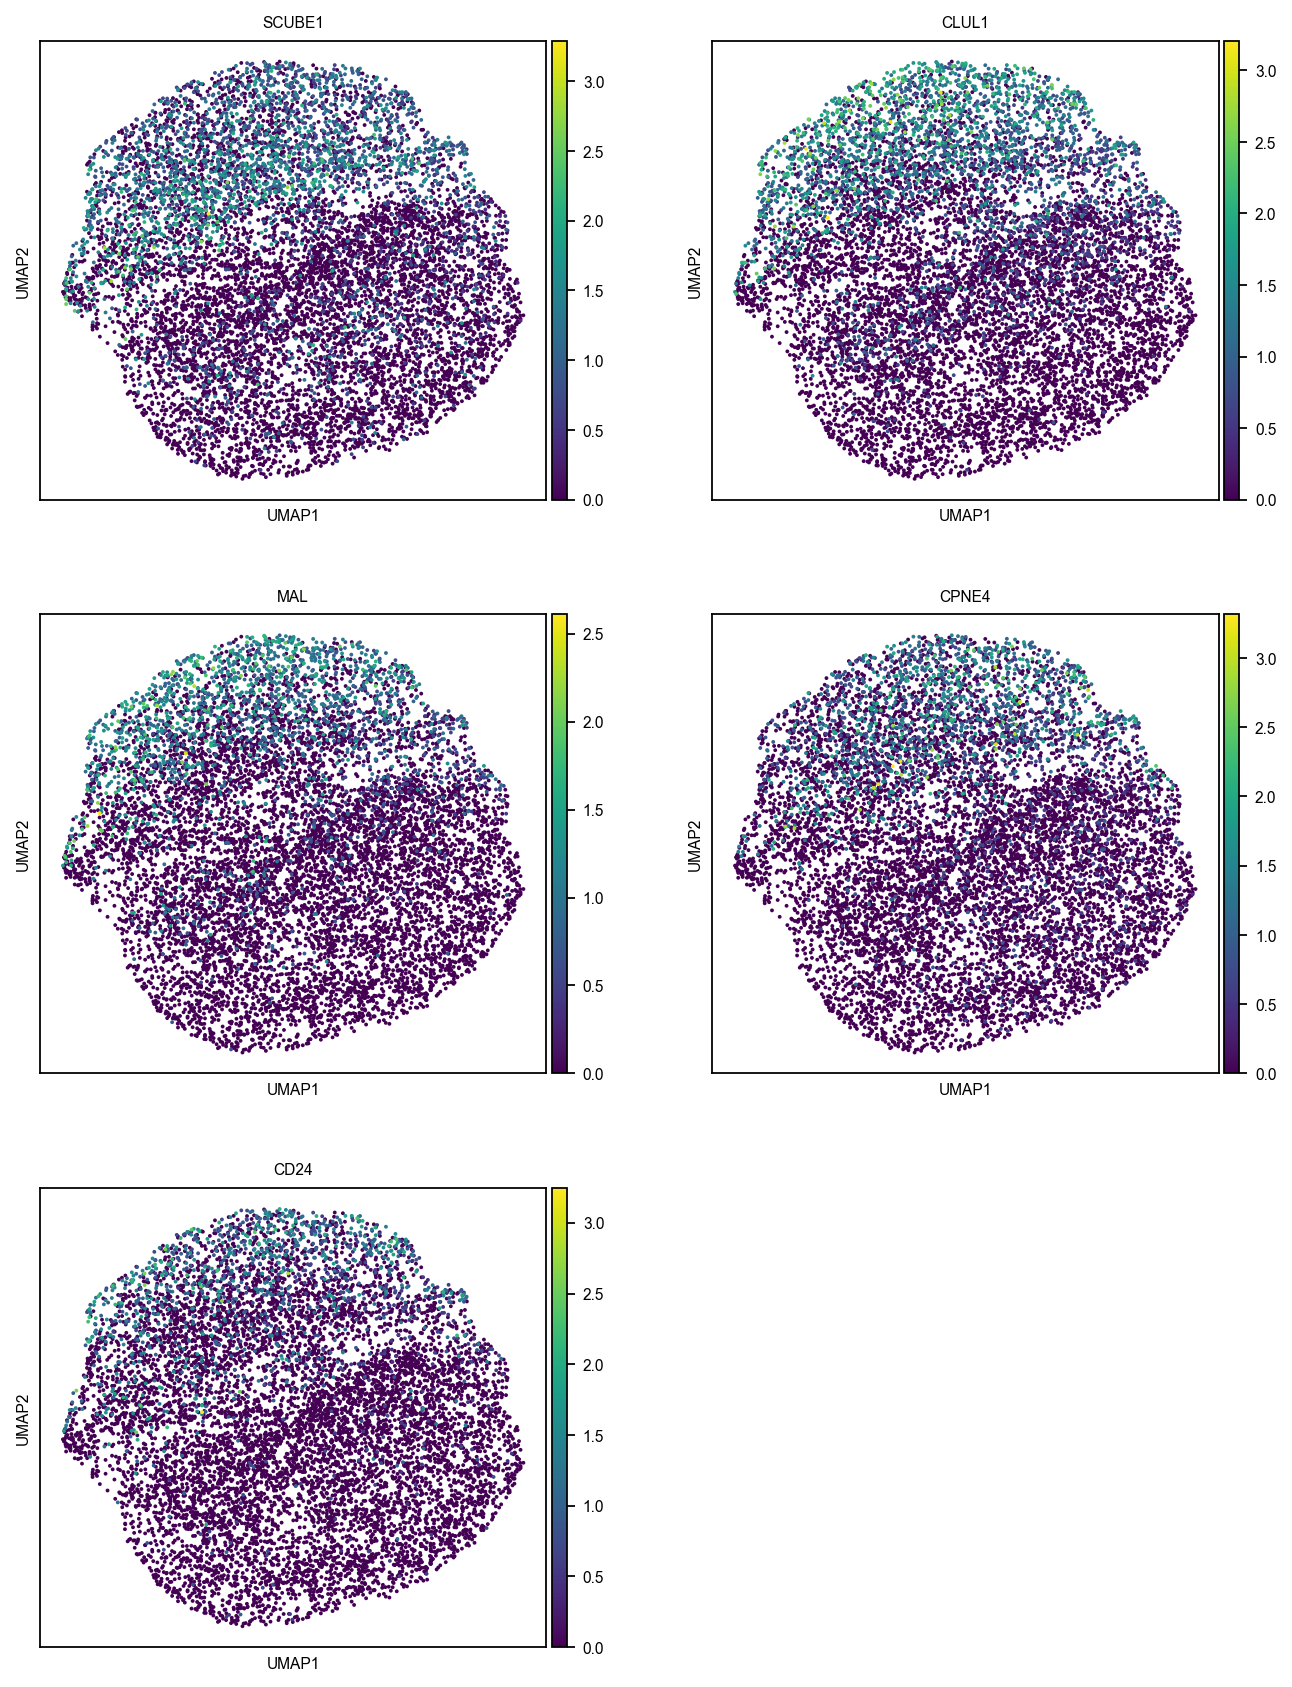

In [23]:
sc.pl.umap(adata, color=['SCUBE1','CLUL1','MAL','CPNE4','CD24'],ncols=2)